In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt

features = torch.load('batched_data\\features')
labels = torch.load('batched_data\\labels')

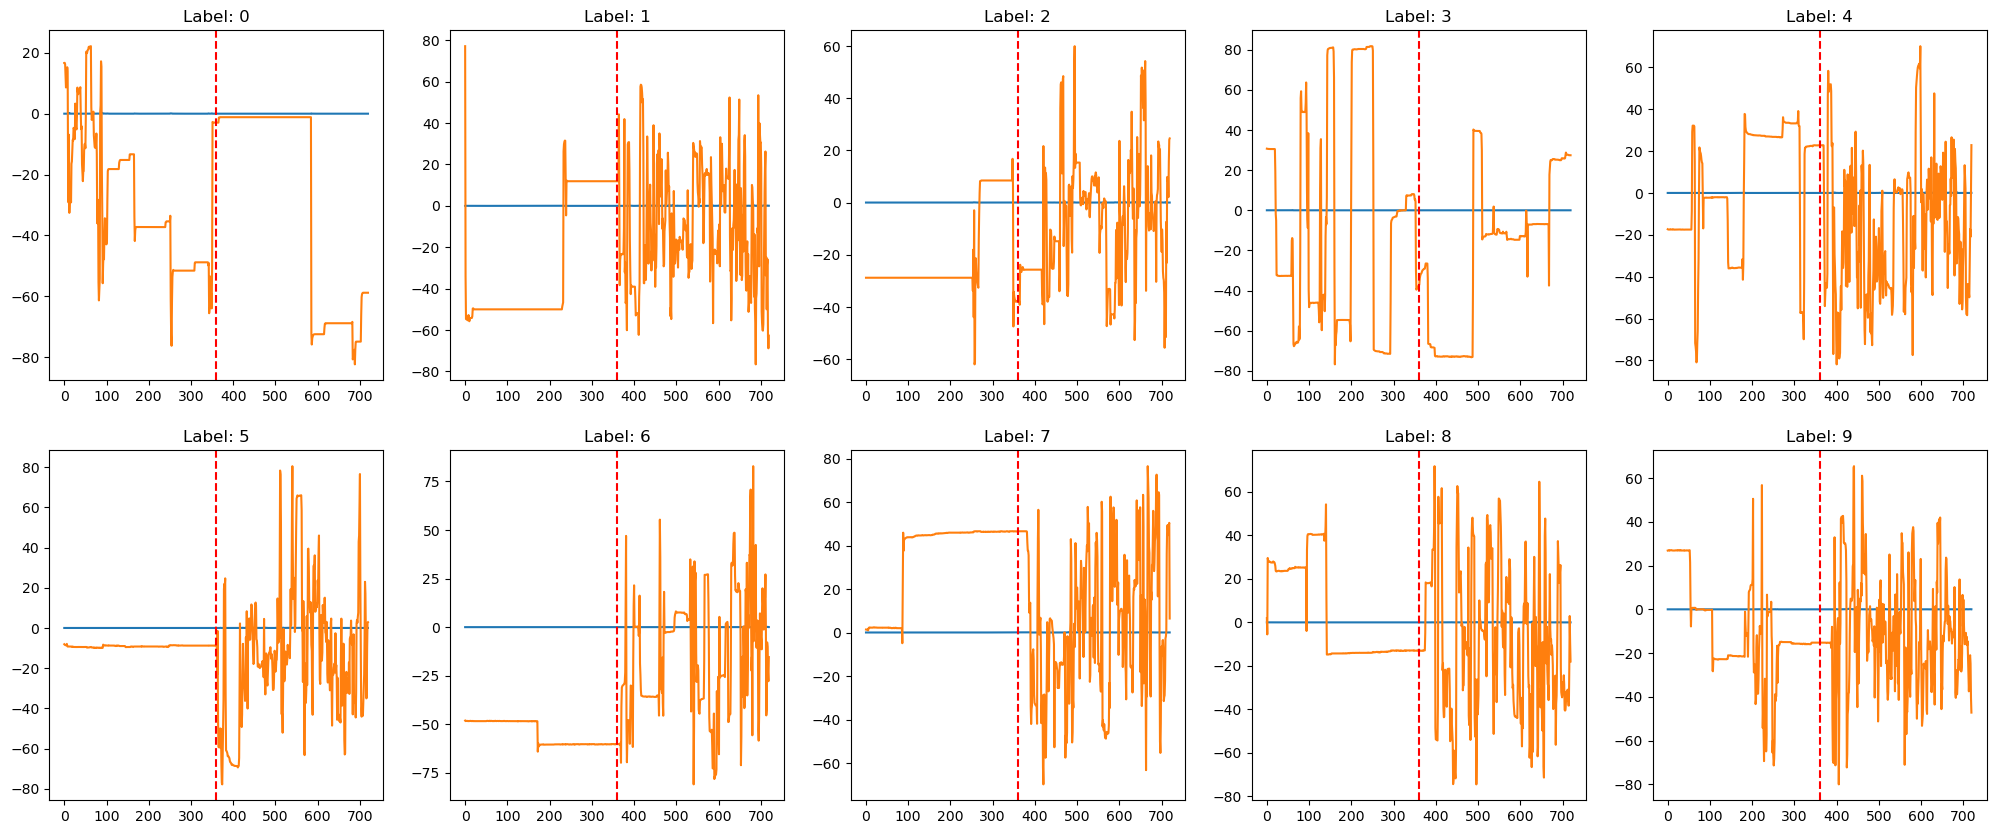

In [55]:
plt.figure(figsize=(25, 10))
count = 0

for i in range(len(labels)):
    timeFrame = 30 * 60 / 5
    label = labels[i]
    start_label = label[0]
    alternate_label = (start_label + 1) % 2

    try:
        event_step = (label == alternate_label).nonzero(as_tuple=True)[0][0]

        start_time = int(event_step - timeFrame)
        end_time = int(event_step + timeFrame)
        
        feature = features[i][start_time:end_time]

        ax = plt.subplot(2, 5, count + 1)
 
        ax.plot(feature) 
        ax.axvline(timeFrame, color='r', linestyle='--')
        ax.set_title('Label: ' + str(count))
        count += 1

    except:
        continue

    if count >= 10:
        break



In [56]:
feature_list = []
label_list = []

for i in range(len(labels)):
    timeFrame = 30 * 60 / 5
    label = labels[i]
    start_label = label[0]
    alternate_label = (start_label + 1) % 2

    try:
        event_step = (label == alternate_label).nonzero(as_tuple=True)[0][0]

        start_time = int(event_step - timeFrame)
        end_time = int(event_step + timeFrame)
        
        feature = features[i][start_time:end_time]
        label = label[start_time:end_time]

        if len(feature) == 720:
            feature_list.append(feature)
            label_list.append(label)

    except: 
        continue



In [57]:
feature_tensor = torch.stack(feature_list)
label_tensor = torch.stack(label_list)

print(feature_tensor.shape)
print(label_tensor.shape)

torch.Size([4739, 720, 2])
torch.Size([4739, 720])


In [58]:
torch.save(feature_tensor, 'batched_data\\features_30min')
torch.save(label_tensor, 'batched_data\\labels_30min')